In [323]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset
df = pd.read_csv('seattle-weather.csv')

In [324]:
# Misalnya, kita ingin menghapus semua baris dengan target 0
target_tertentu = 0

delete_values = ['snow', 'drizzle', 'fog']

for i in delete_values:
    # Temukan indeks semua baris yang memiliki target 0
    indeks_target_tertentu = df[df['weather'] == i].index

    # Gunakan indeks tersebut untuk menghapus baris-baris tersebut dari DataFrame
    df = df.drop(index=indeks_target_tertentu)

# Sekarang, dataset_cleaned akan berisi DataFrame tanpa baris yang memiliki target tertentu


In [325]:
X = df[['precipitation', 'wind']].values
y = df['weather'].values

In [326]:

unique_target = np.unique(y)

# Menampilkan jumlah kemunculan setiap nilai unik dalam kolom 'weather'
value_counts = [np.count_nonzero(y == 'rain'), np.count_nonzero(y == 'sun')]
print("Jumlah kemunculan setiap nilai dalam kolom 'weather':\n", unique_target, "\n", value_counts)


Jumlah kemunculan setiap nilai dalam kolom 'weather':
 ['rain' 'sun'] 
 [641, 640]


In [327]:
# Melakukan encoding pada y agar dtype menjadi int dan dapat diproses
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [328]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.25, random_state = 0)

In [329]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [330]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel="linear", random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [331]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan akurasi
print("Akurasi:", accuracy)


Akurasi: 0.9127725856697819


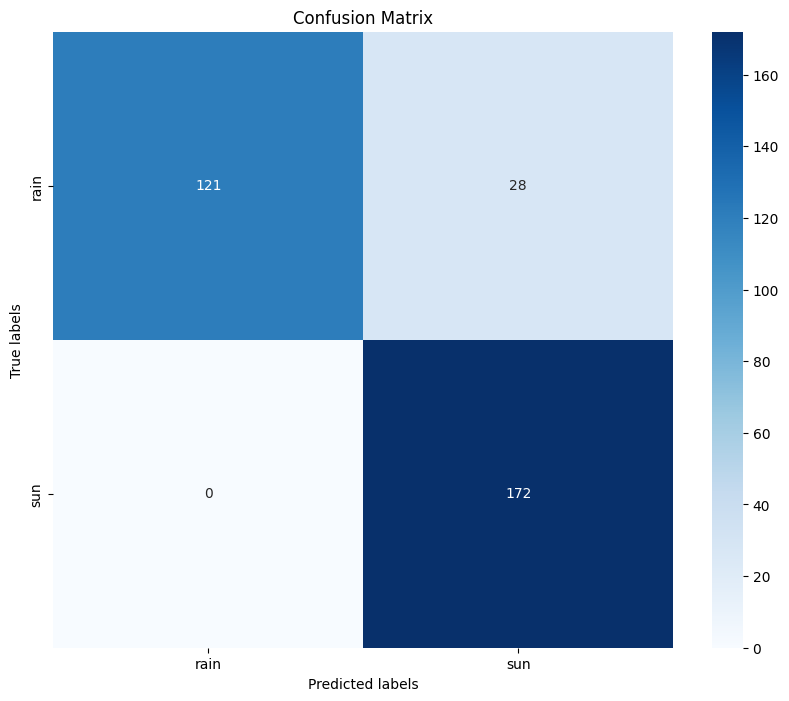

In [332]:
unique_target = np.unique(y)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix dalam bentuk heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=unique_target, yticklabels=unique_target)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [333]:
print(np.unique(y_set))

[0 1 2]


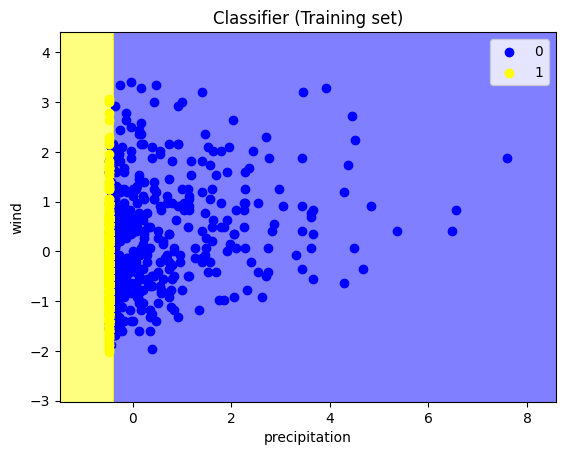

In [334]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

# Mengatur warna untuk masing-masing kelas
colors = ['blue', 'yellow']


X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.50, cmap=ListedColormap(colors[:len(np.unique(y_set))]))



plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot titik-titik data untuk setiap kelas
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label=j)
    
plt.title('Classifier (Training set)')
plt.xlabel('precipitation')
plt.ylabel('wind')
plt.legend()
plt.show()